<center>
    <h1>Spaceship Titanic 数据分析与建模</h1>
     <font size=5>阿水，2022/10/12，Coggle数据科学</font>
</center>

## 赛题介绍

- 赛题链接：https://www.kaggle.com/competitions/spaceship-titanic
- 赛题类型：结构化数据、分类问题
- 赛题难度：入门赛题

### 赛题背景

欢迎来到 2912 年，您需要数据科学技能来解决宇宙之谜。我们收到了四光年外的信号，情况看起来不太妙。宇宙飞船泰坦尼克号是一个月前发射的星际客轮。船上有近 13,000 名乘客，这艘船开始了处女航，将太阳系的移民运送到围绕附近恒星运行的三颗新可居住的系外行星。

在绕过半人马座阿尔法星前往它的第一个目的地——炎热的巨蟹座 55 E 时，粗心的宇宙飞船泰坦尼克号与隐藏在尘埃云中的时空异常相撞。可悲的是，它遭遇了与 1000 年前同名的串子相似的命运。虽然船完好无损，但几乎有一半的乘客被运送到了异次元！**为了帮助救援人员和找回丢失的乘客，您面临的挑战是使用从飞船损坏的计算机系统中恢复的记录来预测哪些乘客被异常运送。**

> 这个赛题可以视为[Kaggle titanic乘客幸存预测](https://www.kaggle.com/competitions/titanic/)的复刻比赛，数据集和字段都非常相似。原始titanic比赛由于标签公开，导致竞技性不强。本次比赛更加适合比较模型精度，数据集更大（虽然数据集是虚假合成的）。

### 评价指标

使用分类准确率进行评价，提交格式如下：

```
PassengerId,Transported
0013_01,False
0018_01,False
0019_01,False
0021_01,False
etc.
```

### 数据介绍

在本次比赛中，您的任务是预测在泰坦尼克号飞船与时空异常相撞期间是否有乘客被运送到另一个维度。为了帮助你做出这些预测，你会得到一组从船上受损的计算机系统中存储的个人记录。

文件介绍：
- train.csv - 大约三分之二 (~8700) 乘客的个人记录，用作训练数据。
- test.csv - 其余三分之一（~4300）乘客的个人记录，用作测试数据。您的任务是为该集合中的乘客预测已运输的值。
- sample_submission.csv - 提交样例

字段介绍：

-   `PassengerId` - 每位乘客的唯一 ID。每个 Id 采用 gggg_pp 的形式，其中 gggg 表示乘客旅行的组，pp 是他们在组中的编号。群体中的人通常是家庭成员，但并非总是如此。
-   `HomePlanet` - 乘客离开的星球，通常是他们的永久居住星球。
-   `CryoSleep` - 指示乘客是否选择在航程期间进入假死状态。处于低温睡眠状态的乘客被限制在他们的客舱内。
-   `Cabin` - 乘客入住的客舱编号。采用 `deck/num/side` 的形式，其中 `side` 可以是 *Port* 的`P` 或 *Starboard* 的`S`。
-   `Destination` - 乘客将要去的星球。
-   `Age` - 乘客的年龄。
-   `VIP` - 旅客在航程中是否支付了特殊VIP服务费用。
-   `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - 乘客在 *Spaceship Titanic* 的许多豪华设施中的每一个费用。
-   `Name` - 乘客的名字和姓氏。
-   `Transported` - 乘客是否被运送到另一个维度。这是要预测的列。

## 数据读取

In [273]:
# 用于数据读取和统计
import pandas as pd

# 用于数值计算
import numpy as np

# 用于绘图
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图格式
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams['figure.dpi'] = 50

In [274]:
# 读取数据集
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')

In [275]:
# 查看数据集尺寸
train_df.shape, test_df.shape

((8693, 14), (4277, 13))

In [276]:
# 查看数据集样例
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 数据分析

### 标签分布

In [277]:
train_df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

### 描述性分析

In [278]:
# 对训练集进行字段描述
train_df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [279]:
# 对训练集进行字段描述
test_df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,4277,4190,4184,4177,4185,4186.000000,4184,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4183
unique,4277,3,2,3265,3,NaN,2,NaN,NaN,NaN,NaN,NaN,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Cints Erle
freq,1,2263,2640,8,2956,NaN,4110,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,28.658146,NaN,219.266269,439.484296,177.295525,303.052443,310.710031,NaN
std,NaN,NaN,NaN,NaN,NaN,14.179072,NaN,607.011289,1527.663045,560.821123,1117.186015,1246.994742,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,53.000000,78.000000,33.000000,50.000000,36.000000,NaN


### 缺失值分析

#### 列缺失值比例

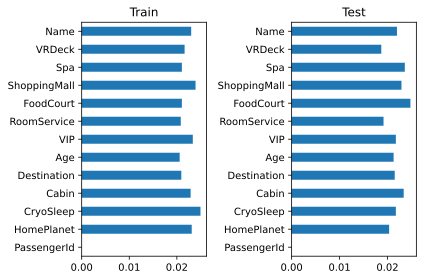

In [280]:
plt.figure(figsize=(6, 4))
plt.subplot(121)
train_df.drop('Transported', axis=1).isnull().mean().plot(kind='barh')
plt.title('Train')

plt.subplot(122)
test_df.isnull().mean().plot(kind='barh')
plt.title('Test')

plt.tight_layout()

#### 列缺失值相关性

In [195]:
train_df.isnull().corr()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,NaN,1.000000,-0.014804,0.007158,-0.001113,-0.011528,-0.008585,0.009729,-0.011897,0.010972,-0.006565,-0.017612,0.012128,NaN
CryoSleep,NaN,-0.014804,1.000000,0.010020,-0.002798,-0.018008,0.009436,-0.013004,-0.008055,0.013547,0.002218,0.011694,0.024627,NaN
Cabin,NaN,0.007158,0.010020,1.000000,-0.000894,-0.000529,0.006891,-0.000773,0.004344,-0.013899,-0.011730,-0.001606,-0.013228,NaN
Destination,NaN,-0.001113,-0.002798,-0.000894,1.000000,-0.004230,-0.001331,-0.004443,0.012138,0.003392,-0.004653,-0.010694,-0.001004,NaN
Age,NaN,-0.011528,-0.018008,-0.000529,-0.004230,1.000000,0.009762,-0.015471,0.001308,-0.001500,-0.015620,0.000717,-0.006042,NaN
VIP,NaN,-0.008585,0.009436,0.006891,-0.001331,0.009762,1.000000,-0.001210,-0.001451,-0.004273,-0.012063,-0.017753,-0.018648,NaN
RoomService,NaN,0.009729,-0.013004,-0.000773,-0.004443,-0.015471,-0.001210,1.000000,-0.010160,-0.001744,-0.004548,-0.010603,-0.017004,NaN
FoodCourt,NaN,-0.011897,-0.008055,0.004344,0.012138,0.001308,-0.001451,-0.010160,1.000000,-0.012473,0.006406,0.011251,0.004221,NaN
ShoppingMall,NaN,0.010972,0.013547,-0.013899,0.003392,-0.001500,-0.004273,-0.001744,-0.012473,1.000000,-0.012473,0.007771,-0.003944,NaN


### 列相关性

In [196]:
train_df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [197]:
train_df['Passenger_group'] = train_df['PassengerId'].apply(lambda x: x.split('_')[0])
train_df['Passenger_groupid'] = train_df['PassengerId'].apply(lambda x: x.split('_')[1])

test_df['Passenger_group'] = test_df['PassengerId'].apply(lambda x: x.split('_')[0])
test_df['Passenger_groupid'] = test_df['PassengerId'].apply(lambda x: x.split('_')[1])

In [198]:
data = pd.DataFrame()
for col in train_df.columns[1:]:
    if train_df[col].dtype == object:
        data[col] = pd.factorize(train_df[col])[0]
    else:
        data[col] = train_df[col]

data.corr()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Passenger_group,Passenger_groupid
HomePlanet,1.000000,-0.037065,-0.004802,-0.212843,-0.120503,-0.053798,0.178878,-0.279357,0.077910,-0.203228,-0.228913,-0.005073,-0.094689,-0.008716,-0.067507
CryoSleep,-0.037065,1.000000,-0.013912,0.090537,-0.062649,-0.050223,-0.226037,-0.191130,-0.190339,-0.182918,-0.179129,-0.005187,0.424362,-0.009252,0.057614
Cabin,-0.004802,-0.013912,1.000000,-0.000167,-0.007797,0.001420,-0.003791,-0.009717,0.019949,-0.009816,0.015029,0.920364,0.021866,0.962081,0.006161
Destination,-0.212843,0.090537,-0.000167,1.000000,0.004248,0.027978,-0.044733,0.110659,-0.022977,0.053614,0.073654,0.002073,0.104817,0.002695,0.032357
Age,-0.120503,-0.062649,-0.007797,0.004248,1.000000,0.070953,0.068723,0.130421,0.033133,0.123970,0.101007,-0.009016,-0.075026,-0.009460,-0.132756
VIP,-0.053798,-0.050223,0.001420,0.027978,0.070953,1.000000,0.029853,0.089942,0.027081,0.048117,0.087033,-0.000002,-0.027802,0.002665,0.003081
RoomService,0.178878,-0.226037,-0.003791,-0.044733,0.068723,0.029853,1.000000,-0.015889,0.054480,0.010080,-0.019581,0.000264,-0.244611,-0.000357,-0.022571
FoodCourt,-0.279357,-0.191130,-0.009717,0.110659,0.130421,0.089942,-0.015889,1.000000,-0.014228,0.221891,0.227995,-0.009094,0.046566,-0.009608,0.023391
ShoppingMall,0.077910,-0.190339,0.019949,-0.022977,0.033133,0.027081,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.005047,0.010141,0.017466,-0.038812
Spa,-0.203228,-0.182918,-0.009816,0.053614,0.123970,0.048117,0.010080,0.221891,0.013879,1.000000,0.153821,-0.004038,-0.221131,-0.005151,0.016820


<AxesSubplot:>

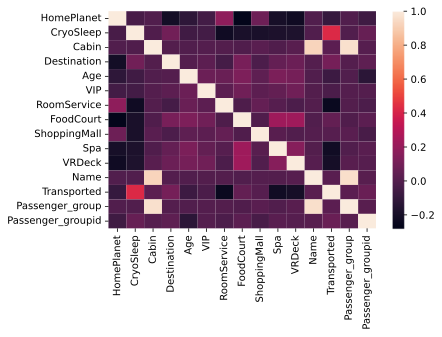

In [199]:
sns.heatmap(data.corr())

### 字段数据分析

#### PassengerId

Text(0.5, 1.0, 'Test')

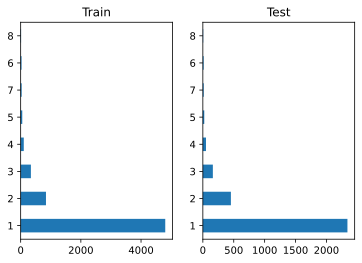

In [200]:
plt.figure(figsize=(6, 4))
plt.subplot(121)
train_df['Passenger_group'].value_counts().value_counts().plot(kind='barh')
plt.title('Train')

plt.subplot(122)
test_df['Passenger_group'].value_counts().value_counts().plot(kind='barh')
plt.title('Test')

In [201]:
passenger_gp_freq = train_df['Passenger_group'].value_counts()
passenger_gp_freq = passenger_gp_freq[passenger_gp_freq > 1].index
passenger_gp_tr = train_df[train_df['Passenger_group'].isin(passenger_gp_freq)]

<AxesSubplot:ylabel='Density'>

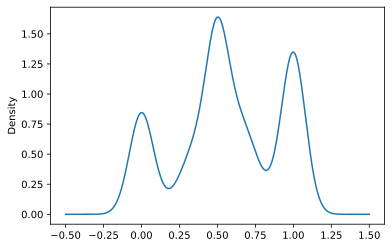

In [210]:
passenger_gp_tr.groupby('Passenger_group')['Transported'].mean().plot(kind='kde')

#### HomePlanet

In [70]:
train_df.groupby('HomePlanet')['Transported'].mean()

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64

In [71]:
train_df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

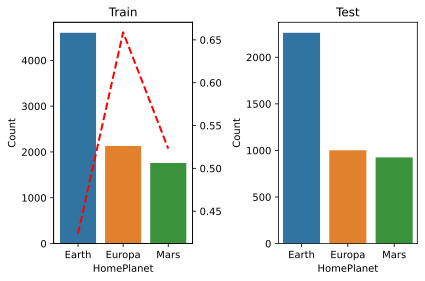

In [147]:
analysis_col = 'HomePlanet'

plt.figure(figsize=(6, 4))
plt.subplot(121)
ax1 = sns.countplot(x=analysis_col, data=train_df, order=train_df[analysis_col].value_counts().index)
train_df.groupby(analysis_col)['Transported'].mean().plot(ax=ax1.twinx(), color='red', linestyle='dashed', linewidth=2)
ax1.set_ylabel('Count')
plt.title('Train')

plt.subplot(122)
sns.countplot(x=analysis_col, data=test_df, order=train_df[analysis_col].value_counts().index)
plt.ylabel('Count')
plt.title('Test')

plt.tight_layout()

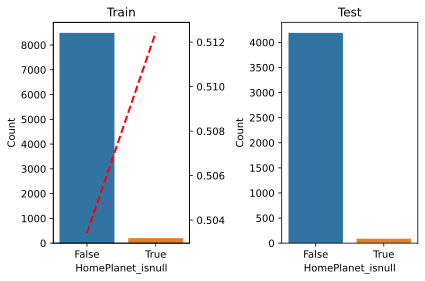

In [146]:
train_df['HomePlanet_isnull'] = train_df['HomePlanet'].isnull()
test_df['HomePlanet_isnull'] = test_df['HomePlanet'].isnull()

analysis_col = 'HomePlanet_isnull'

plt.figure(figsize=(6, 4))
plt.subplot(121)
ax1 = sns.countplot(x=analysis_col, data=train_df, order=train_df[analysis_col].value_counts().index)
train_df.groupby(analysis_col)['Transported'].mean().plot(ax=ax1.twinx(), color='red', linestyle='dashed', linewidth=2)
ax1.set_ylabel('Count')
plt.title('Train')

plt.subplot(122)
sns.countplot(x=analysis_col, data=test_df, order=train_df[analysis_col].value_counts().index)
plt.ylabel('Count')
plt.title('Test')

plt.tight_layout()

#### CryoSleep

In [148]:
train_df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [149]:
train_df.groupby('CryoSleep')['Transported'].mean()

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64

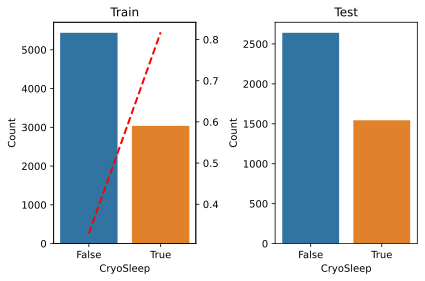

In [150]:
analysis_col = 'CryoSleep'

plt.figure(figsize=(6, 4))
plt.subplot(121)
ax1 = sns.countplot(x=analysis_col, data=train_df, order=train_df[analysis_col].value_counts().index)
train_df.groupby(analysis_col)['Transported'].mean().plot(ax=ax1.twinx(), color='red', linestyle='dashed', linewidth=2)
ax1.set_ylabel('Count')
plt.title('Train')

plt.subplot(122)
sns.countplot(x=analysis_col, data=test_df, order=train_df[analysis_col].value_counts().index)
plt.ylabel('Count')
plt.title('Test')

plt.tight_layout()

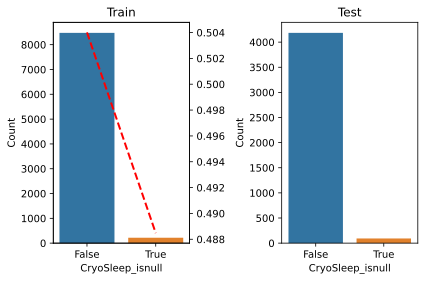

In [151]:
train_df['CryoSleep_isnull'] = train_df['CryoSleep'].isnull()
test_df['CryoSleep_isnull'] = test_df['CryoSleep'].isnull()

analysis_col = 'CryoSleep_isnull'

plt.figure(figsize=(6, 4))
plt.subplot(121)
ax1 = sns.countplot(x=analysis_col, data=train_df, order=train_df[analysis_col].value_counts().index)
train_df.groupby(analysis_col)['Transported'].mean().plot(ax=ax1.twinx(), color='red', linestyle='dashed', linewidth=2)
ax1.set_ylabel('Count')
plt.title('Train')

plt.subplot(122)
sns.countplot(x=analysis_col, data=test_df, order=train_df[analysis_col].value_counts().index)
plt.ylabel('Count')
plt.title('Test')

plt.tight_layout()

##### Cabin

In [212]:
train_df['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

<AxesSubplot:>

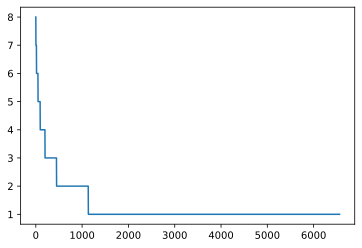

In [213]:
train_df['Cabin'].value_counts().reset_index()['Cabin'].plot()

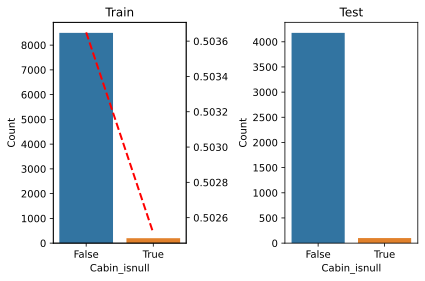

In [222]:
train_df['Cabin_isnull'] = train_df['Cabin'].isnull()
test_df['Cabin_isnull'] = test_df['Cabin'].isnull()

analysis_col = 'Cabin_isnull'

plt.figure(figsize=(6, 4))
plt.subplot(121)
ax1 = sns.countplot(x=analysis_col, data=train_df, order=train_df[analysis_col].value_counts().index)
train_df.groupby(analysis_col)['Transported'].mean().plot(ax=ax1.twinx(), color='red', linestyle='dashed', linewidth=2)
ax1.set_ylabel('Count')
plt.title('Train')

plt.subplot(122)
sns.countplot(x=analysis_col, data=test_df, order=train_df[analysis_col].value_counts().index)
plt.ylabel('Count')
plt.title('Test')

plt.tight_layout()

In [214]:
train_df['Cabin_1'] = train_df['Cabin'].fillna('///').apply(lambda x: x.split('/')[0])
train_df['Cabin_2'] = train_df['Cabin'].fillna('///').apply(lambda x: x.split('/')[1])
train_df['Cabin_3'] = train_df['Cabin'].fillna('///').apply(lambda x: x.split('/')[2])

train_df['Cabin_1'] = train_df['Cabin_1'].replace('', np.nan)
train_df['Cabin_2'] = train_df['Cabin_2'].replace('', np.nan)
train_df['Cabin_3'] = train_df['Cabin_3'].replace('', np.nan)

test_df['Cabin_1'] = test_df['Cabin'].fillna('///').apply(lambda x: x.split('/')[0])
test_df['Cabin_2'] = test_df['Cabin'].fillna('///').apply(lambda x: x.split('/')[1])
test_df['Cabin_3'] = test_df['Cabin'].fillna('///').apply(lambda x: x.split('/')[2])

test_df['Cabin_1'] = test_df['Cabin_1'].replace('', np.nan)
test_df['Cabin_2'] = test_df['Cabin_2'].replace('', np.nan)
test_df['Cabin_3'] = test_df['Cabin_3'].replace('', np.nan)

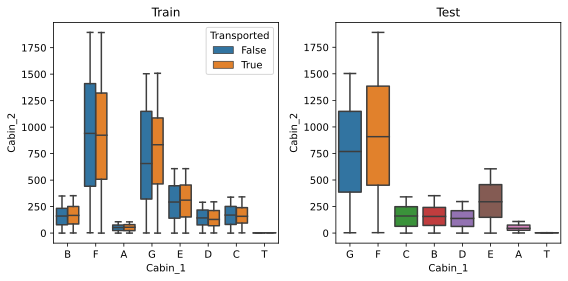

In [235]:
filter_train = train_df[['Cabin_1', 'Cabin_2', 'Cabin_3', 'Transported']].dropna()
filter_train['Cabin_2'] = filter_train['Cabin_2'].astype(int)

filter_test = test_df[['Cabin_1', 'Cabin_2', 'Cabin_3']].dropna()
filter_test['Cabin_2'] = filter_test['Cabin_2'].astype(int)

plt.figure(figsize=(8, 4))
plt.subplot(121)
sns.boxplot(y='Cabin_2', data=filter_train, x='Cabin_1', hue='Transported')
plt.title('Train')

plt.subplot(122)
sns.boxplot(y='Cabin_2', data=filter_test, x='Cabin_1')
plt.title('Test')
plt.tight_layout()

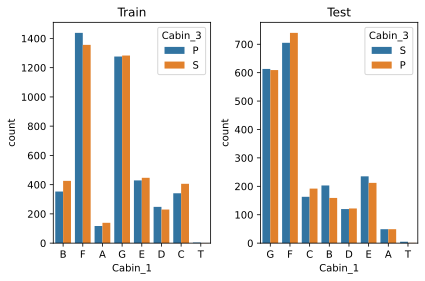

In [245]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
sns.countplot(x='Cabin_1', data=filter_train, hue='Cabin_3')
plt.title('Train')

plt.subplot(122)
sns.countplot(x='Cabin_1', data=filter_test, hue='Cabin_3')
plt.title('Test')
plt.tight_layout()

<AxesSubplot:xlabel='Cabin_1', ylabel='Transported'>

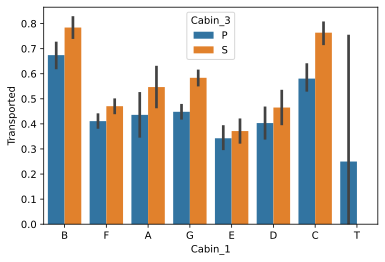

In [246]:
sns.barplot(x='Cabin_1', data=filter_train, hue='Cabin_3', y='Transported')

##### Cabin_1

In [215]:
train_df['Cabin_1'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_1, dtype: int64

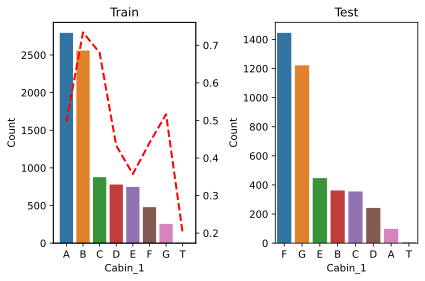

In [216]:
analysis_col = 'Cabin_1'

plt.figure(figsize=(6, 4))
plt.subplot(121)
ax1 = sns.countplot(x=analysis_col, data=train_df, order=train_df[analysis_col].value_counts().index)
train_df.groupby(analysis_col)['Transported'].mean().plot(ax=ax1.twinx(), color='red', linestyle='dashed', linewidth=2)
ax1.set_ylabel('Count')
plt.title('Train')

plt.subplot(122)
sns.countplot(x=analysis_col, data=test_df, order=train_df[analysis_col].value_counts().index)
plt.ylabel('Count')
plt.title('Test')

plt.tight_layout()

##### Cabin_2

In [217]:
train_df['Cabin_2'].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Cabin_2, Length: 1817, dtype: int64

In [218]:
filter_train = train_df[~train_df['Cabin_2'].isnull()][['Cabin_2', 'Transported']]
filter_train['Cabin_2'] = filter_train['Cabin_2'].astype(int)

filter_test = test_df[~test_df['Cabin_2'].isnull()][['Cabin_2']]
filter_test['Cabin_2'] = filter_test['Cabin_2'].astype(int)

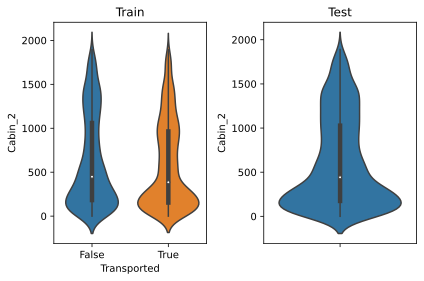

In [220]:
plt.figure(figsize=(6, 4))
plt.subplot(121)
sns.violinplot(y='Cabin_2', data=filter_train, x='Transported')
plt.title('Train')

plt.subplot(122)
sns.violinplot(y='Cabin_2', data=filter_test)
plt.title('Test')
plt.tight_layout()

##### Cabin_3

In [25]:
train_df['Cabin_3'].value_counts()

S    4288
P    4206
Name: Cabin_3, dtype: int64

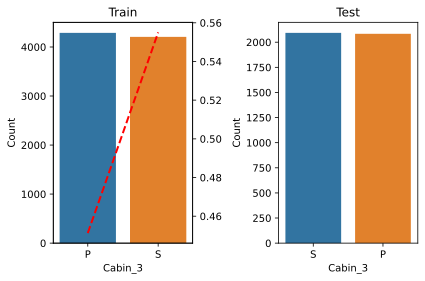

In [221]:
analysis_col = 'Cabin_3'

plt.figure(figsize=(6, 4))
plt.subplot(121)
ax1 = sns.countplot(x=analysis_col, data=train_df, order=train_df[analysis_col].value_counts().index)
train_df.groupby(analysis_col)['Transported'].mean().plot(ax=ax1.twinx(), color='red', linestyle='dashed', linewidth=2)
ax1.set_ylabel('Count')
plt.title('Train')

plt.subplot(122)
sns.countplot(x=analysis_col, data=test_df, order=train_df[analysis_col].value_counts().index)
plt.ylabel('Count')
plt.title('Test')

plt.tight_layout()

#### Destination

In [27]:
train_df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

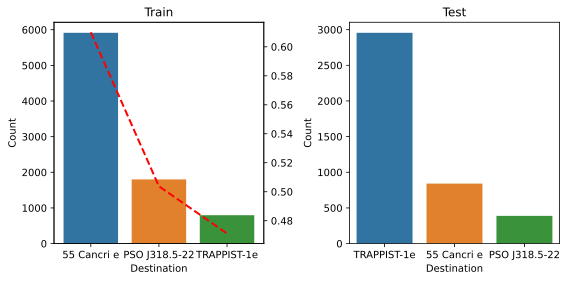

In [248]:
analysis_col = 'Destination'

plt.figure(figsize=(8, 4))
plt.subplot(121)
ax1 = sns.countplot(x=analysis_col, data=train_df, order=train_df[analysis_col].value_counts().index)
train_df.groupby(analysis_col)['Transported'].mean().plot(ax=ax1.twinx(), color='red', linestyle='dashed', linewidth=2)
ax1.set_ylabel('Count')
plt.title('Train')

plt.subplot(122)
sns.countplot(x=analysis_col, data=test_df, order=train_df[analysis_col].value_counts().index)
plt.ylabel('Count')
plt.title('Test')

plt.tight_layout()

#### Age

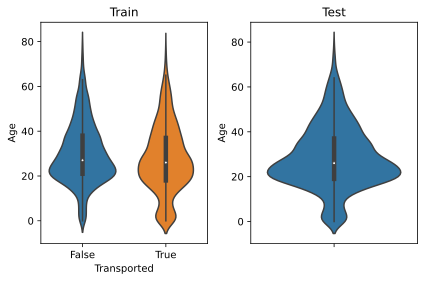

In [250]:
plt.figure(figsize=(6, 4))
plt.subplot(121)
sns.violinplot(y='Age', data=train_df, x='Transported')
plt.title('Train')

plt.subplot(122)
sns.violinplot(y='Age', data=test_df)
plt.title('Test')
plt.tight_layout()

#### VIP

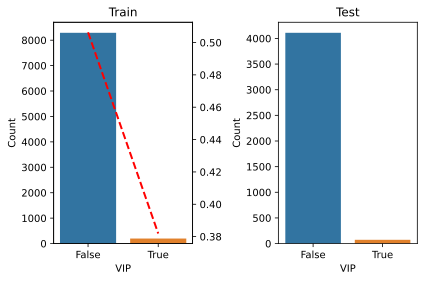

In [255]:
analysis_col = 'VIP'

plt.figure(figsize=(6, 4))
plt.subplot(121)
ax1 = sns.countplot(x=analysis_col, data=train_df, order=train_df[analysis_col].value_counts().index)
train_df.groupby(analysis_col)['Transported'].mean().plot(ax=ax1.twinx(), color='red', linestyle='dashed', linewidth=2)
ax1.set_ylabel('Count')
plt.title('Train')

plt.subplot(122)
sns.countplot(x=analysis_col, data=test_df, order=train_df[analysis_col].value_counts().index)
plt.ylabel('Count')
plt.title('Test')

plt.tight_layout()

#### RoomService

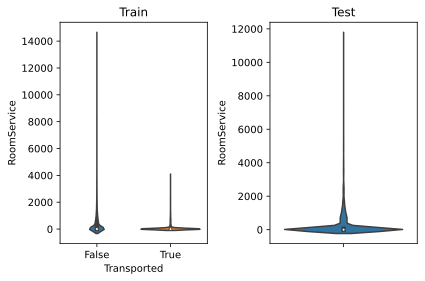

In [256]:
plt.figure(figsize=(6, 4))
plt.subplot(121)
sns.violinplot(y='RoomService', data=train_df, x='Transported')
plt.title('Train')

plt.subplot(122)
sns.violinplot(y='RoomService', data=test_df)
plt.title('Test')
plt.tight_layout()

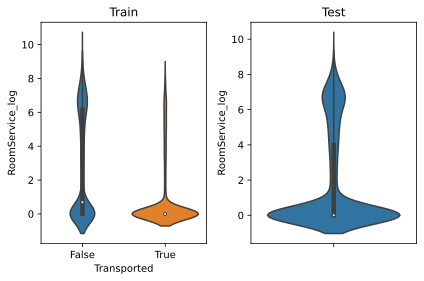

In [257]:
train_df['RoomService_log'] = np.log1p(train_df['RoomService'])
test_df['RoomService_log'] = np.log1p(test_df['RoomService'])

plt.figure(figsize=(6, 4))
plt.subplot(121)
sns.violinplot(y='RoomService_log', data=train_df, x='Transported')
plt.title('Train')

plt.subplot(122)
sns.violinplot(y='RoomService_log', data=test_df)
plt.title('Test')
plt.tight_layout()

#### FoodCourt

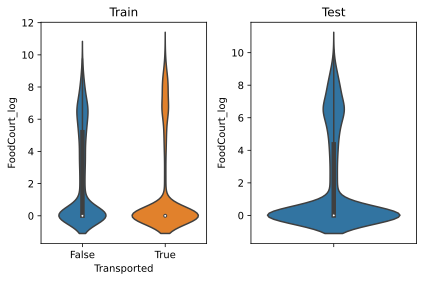

In [258]:
train_df['FoodCourt_log'] = np.log1p(train_df['FoodCourt'])
test_df['FoodCourt_log'] = np.log1p(test_df['FoodCourt'])

plt.figure(figsize=(6, 4))
plt.subplot(121)
sns.violinplot(y='FoodCourt_log', data=train_df, x='Transported')
plt.title('Train')

plt.subplot(122)
sns.violinplot(y='FoodCourt_log', data=test_df)
plt.title('Test')
plt.tight_layout()

#### ShoppingMall

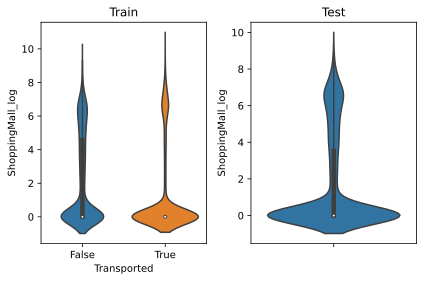

In [259]:
analysis_col = 'ShoppingMall'

train_df[analysis_col+'_log'] = np.log1p(train_df[analysis_col])
test_df[analysis_col+'_log'] = np.log1p(test_df[analysis_col])

plt.figure(figsize=(6, 4))
plt.subplot(121)
sns.violinplot(y=analysis_col+'_log', data=train_df, x='Transported')
plt.title('Train')

plt.subplot(122)
sns.violinplot(y=analysis_col+'_log', data=test_df)
plt.title('Test')
plt.tight_layout()

#### Spa

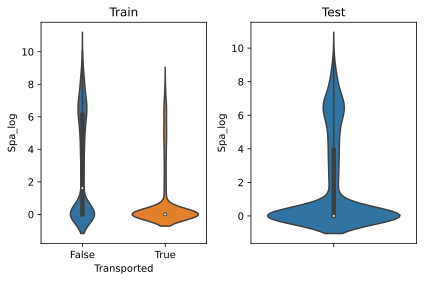

In [260]:
analysis_col = 'Spa'

train_df[analysis_col+'_log'] = np.log1p(train_df[analysis_col])
test_df[analysis_col+'_log'] = np.log1p(test_df[analysis_col])

plt.figure(figsize=(6, 4))
plt.subplot(121)
sns.violinplot(y=analysis_col+'_log', data=train_df, x='Transported')
plt.title('Train')

plt.subplot(122)
sns.violinplot(y=analysis_col+'_log', data=test_df)
plt.title('Test')
plt.tight_layout()

#### VRDeck

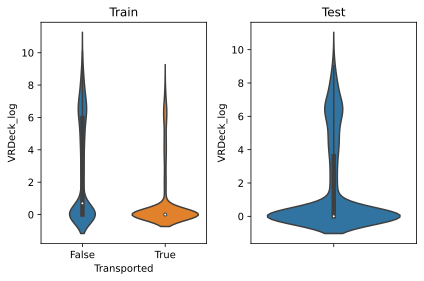

In [261]:
analysis_col = 'VRDeck'

train_df[analysis_col+'_log'] = np.log1p(train_df[analysis_col])
test_df[analysis_col+'_log'] = np.log1p(test_df[analysis_col])

plt.figure(figsize=(6, 4))
plt.subplot(121)
sns.violinplot(y=analysis_col+'_log', data=train_df, x='Transported')
plt.title('Train')

plt.subplot(122)
sns.violinplot(y=analysis_col+'_log', data=test_df)
plt.title('Test')
plt.tight_layout()

#### Name

In [262]:
train_df['Name1'] = train_df['Name'].fillna('  ').apply(lambda x: x.split(' ')[0])
train_df['Name2'] = train_df['Name'].fillna('  ').apply(lambda x: x.split(' ')[1])

train_df['Name1'] = train_df['Name1'].replace('', np.nan)
train_df['Name2'] = train_df['Name2'].replace('', np.nan)

test_df['Name1'] = test_df['Name'].fillna('  ').apply(lambda x: x.split(' ')[0])
test_df['Name2'] = test_df['Name'].fillna('  ').apply(lambda x: x.split(' ')[1])

test_df['Name1'] = test_df['Name1'].replace('', np.nan)
test_df['Name2'] = test_df['Name2'].replace('', np.nan)

In [263]:
train_df['Name1'].value_counts()

Idace      13
Loree      12
Glena      11
Gwendy     11
Kaye       11
           ..
Capies      1
Blues       1
Preonon     1
Siese       1
Chain       1
Name: Name1, Length: 2706, dtype: int64

In [264]:
train_df['Name2'].value_counts()

Casonston     18
Oneiles       16
Domington     15
Litthews      15
Browlerson    14
              ..
Covale         1
Dun            1
Witalnerod     1
Deryplinet     1
Sionerorly     1
Name: Name2, Length: 2217, dtype: int64

In [265]:
top_name1_tr = train_df['Name1'].value_counts().index[:20]
filter_train = train_df[train_df['Name1'].isin(top_name1_tr)]

top_name1_te = test_df['Name1'].value_counts().index[:20]
filter_test = test_df[test_df['Name1'].isin(top_name1_te)]

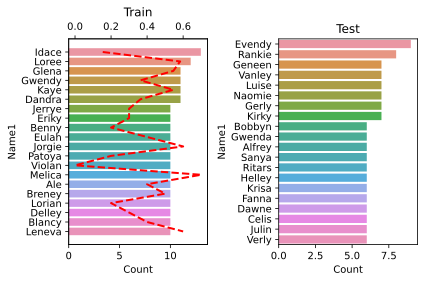

In [266]:
plt.figure(figsize=(6, 4))
plt.subplot(121)
ax1 = sns.countplot(y='Name1', data=filter_train, order=top_name1_tr)
ax2 = ax1.twiny()
name1_target = filter_train.groupby('Name1')['Transported'].mean().loc[top_name1_tr]
ax2.plot(name1_target.values, range(len(name1_target)), color='red', linestyle='dashed', linewidth=2)
# plt.legend(['Transported Probability'], loc=1)
ax1.set_xlabel('Count')
plt.title('Train')

plt.subplot(122)
sns.countplot(y='Name1', data=filter_test, order=top_name1_te)
plt.xlabel('Count')
plt.title('Test')

plt.tight_layout()

In [267]:
top_name2_tr = train_df['Name2'].value_counts().index[:20]
filter_train = train_df[train_df['Name2'].isin(top_name2_tr)]

top_name2_te = test_df['Name2'].value_counts().index[:20]
filter_test = test_df[test_df['Name2'].isin(top_name2_te)]

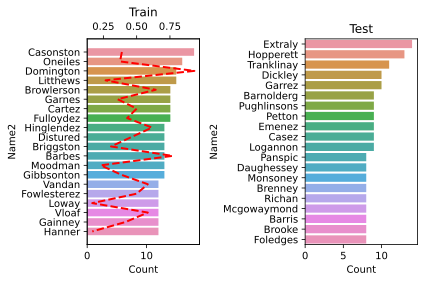

In [268]:
plt.figure(figsize=(6, 4))
plt.subplot(121)
ax1 = sns.countplot(y='Name2', data=filter_train, order=top_name2_tr)
ax2 = ax1.twiny()
name2_target = filter_train.groupby('Name2')['Transported'].mean().loc[top_name2_tr]
ax2.plot(name2_target.values, range(len(name2_target)), color='red', linestyle='dashed', linewidth=2)
ax1.set_xlabel('Count')
plt.title('Train')

plt.subplot(122)
sns.countplot(y='Name2', data=filter_test, order=top_name2_te)
plt.xlabel('Count')
plt.title('Test')

plt.tight_layout()

### 探索性分析

- 问题：乘客旅行的组相同的乘客，名字存在关联吗？
- 问题：乘客的Cabin位置与Transported存在关系吗？
- 问题：乘客的RoomService, FoodCourt, ShoppingMall, Spa, VRDeck等消费字段的关系
- 问题：从乘客名字可以确认其性别吗？

## 预处理与特征编码

In [598]:
from sklearn.preprocessing import LabelEncoder

In [826]:
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
train_test = pd.concat([train_df, test_df], axis=0)
train_test = train_test.reset_index(drop=True)

# PassengerId
train_test['Passenger_group'] = train_test['PassengerId'].apply(lambda x: x.split('_')[0])
train_test['Passenger_groupid'] = train_test['PassengerId'].apply(lambda x: x.split('_')[1])

train_test['Passenger_group'] = train_test['Passenger_group'].astype(int)
train_test['Passenger_groupid'] = train_test['Passenger_groupid'].astype(int)

# HomePlanet
train_test['HomePlanet'] = pd.factorize(train_test['HomePlanet'])[0]

# CryoSleep
train_test['CryoSleep'] = pd.factorize(train_test['CryoSleep'])[0]

# Cabin
train_test['Cabin_1'] = train_test['Cabin'].fillna('///').apply(lambda x: x.split('/')[0])
train_test['Cabin_2'] = train_test['Cabin'].fillna('///').apply(lambda x: x.split('/')[1])
train_test['Cabin_3'] = train_test['Cabin'].fillna('///').apply(lambda x: x.split('/')[2])

train_test['Cabin_1'] = train_test['Cabin_1'].replace('', np.nan)
train_test['Cabin_2'] = train_test['Cabin_2'].replace('', -1).astype(int)
train_test['Cabin_2'] = train_test['Cabin_2'].replace(-1, np.nan)
train_test['Cabin_3'] = train_test['Cabin_3'].replace('', np.nan)

train_test['Cabin_1'] = pd.factorize(train_test['Cabin_1'])[0]
train_test['Cabin_3'] = pd.factorize(train_test['Cabin_3'])[0]

# Destination
train_test['Destination'] = pd.factorize(train_test['Destination'])[0]

# VIP
train_test['VIP'] = pd.factorize(train_test['VIP'])[0]

## 构造新特征

In [917]:
train_test[f'Passenger_group_count_encoding'] = train_test['Passenger_group'].map(train_test['Passenger_group'].value_counts())

for col in ['HomePlanet', 'CryoSleep', 'Destination']:
    train_test[f'{col}_count_encoding'] = train_test[col].map(train_test[col].value_counts())
    train_test[f'{col}_target_encoding'] = train_test[col].map(train_test.groupby([col])['Transported'].mean())
    train_test[col] = train_test[col].replace(-1, np.nan)


train_test['Age'] = pd.qcut(train_test['Age'], 5)
train_test['Age'] = train_test['Age'].cat.codes

train_test['RoomService_minus10'] = (train_test['RoomService'] < 10).astype(int)
train_test['FoodCourt_minus10'] = (train_test['FoodCourt'] < 10).astype(int)
train_test['ShoppingMall_minus10'] = (train_test['ShoppingMall'] < 10).astype(int)
train_test['Spa_minus10'] = (train_test['Spa'] < 10).astype(int)
train_test['VRDeck_minus10'] = (train_test['VRDeck'] < 10).astype(int)

train_test['Extend_price'] = train_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(1)
train_test['Extend_count'] = (train_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] == 0).sum(0)

train_test['Name1'] = train_test['Name'].fillna('  ').apply(lambda x: x.split(' ')[0])
train_test['Name2'] = train_test['Name'].fillna('  ').apply(lambda x: x.split(' ')[1])

train_test['Name1'] = train_test['Name1'].replace('', np.nan)
train_test['Name2'] = train_test['Name2'].replace('', np.nan)

train_test[f'Name2_count_encoding'] = train_test['Name2'].map(train_test['Name2'].value_counts())

## 模型对比

In [918]:
import lightgbm as lgb
from lightgbm import LGBMClassifier, LGBMRegressor

import catboost as cab
from catboost import CatBoostClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [927]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score

def cross_valdate_score(model, X, y, cv=5, scoring='accuracy_score', categorical_feature=[],
                       return_train_score=True, return_estimator=True):
    
    if isinstance(cv, int):
        cv = StratifiedKFold(n_splits=5, random_state=233, shuffle=True)
    elif str(cv.__module__).endswith('split'):
        pass

    if scoring == 'accuracy_score':
        scoring = accuracy_score

    cv_models = []
    train_score, val_score = [], []
    for tr_idx, val_idx in cv.split(X, y):
        fold_tr_x = X.iloc[tr_idx]
        fold_tr_y = y.iloc[tr_idx]

        fold_val_x = X.iloc[val_idx]
        fold_val_y = y.iloc[val_idx]

        if str(model.__module__).startswith('sklearn'):
            model.fit(fold_tr_x, fold_tr_y)

        elif type(model) in [xgb.XGBClassifier]:
            eval_set = [(fold_val_x, fold_val_y)]
            model.fit(fold_tr_x, fold_tr_y, early_stopping_rounds=250, eval_set=eval_set, verbose=0)

        elif type(model) in [lgb.LGBMClassifier]:
            call_back = [lgb.early_stopping(250)]
            eval_set = [(fold_val_x, fold_val_y)]
            
            if len(categorical_feature) != 0:
                categorical_feature = categorical_feature
            else:
                categorical_feature = 'auto'
            
            model.fit(fold_tr_x, fold_tr_y, eval_set=eval_set, callbacks=call_back,
                         categorical_feature=categorical_feature)

        elif type(model) in [cab.CatBoostClassifier]:
            eval_set = [(fold_val_x, fold_val_y)]
            model.fit(fold_tr_x, fold_tr_y, verbose=0, early_stopping_rounds=250, eval_set=eval_set)

        pred = model.predict(fold_val_x)
        val_score.append(scoring(pred, fold_val_y))
        
        pred = model.predict(fold_tr_x)
        train_score.append(scoring(pred, fold_tr_y))
        
        cv_models.append(model)

    return_variable = {'validate_score': val_score}
    if return_train_score:
        return_variable['train_score'] = train_score
    
    if return_estimator:
        return_variable['estimator'] = cv_models
    
    if len(return_variable) == 1:
        return val_score
    else:
        return return_variable

In [928]:
X = train_test.drop(['PassengerId', 'Cabin', 'Name', 'Transported', 'Name1', 'Name2'], axis=1)
X_tr = X.iloc[:train_df.shape[0]]
X_te = X.iloc[train_df.shape[0]:]
y_tr = train_df['Transported']
y_tr = y_tr.astype(int)

In [929]:
feature_name = list(X.columns)

In [930]:
lr_result = cross_valdate_score(LogisticRegression(max_iter=3000), X_tr.fillna(-1), y_tr)
sgd_result = cross_valdate_score(SGDClassifier(max_iter=3000), X_tr.fillna(-1), y_tr)
knn_result = cross_valdate_score(KNeighborsClassifier(), X_tr.fillna(-1), y_tr)
tree_result = cross_valdate_score(DecisionTreeClassifier(), X_tr.fillna(-1), y_tr)
rf_result = cross_valdate_score(RandomForestClassifier(), X_tr.fillna(-1), y_tr)

lgb_result = cross_valdate_score(LGBMClassifier(objective='binary', verbose=-1, learning_rate=0.05), X_tr, y_tr,
                                categorical_feature = ['HomePlanet', 'CryoSleep', 'Destination', 'Cabin_1'])
xgb_result = cross_valdate_score(XGBClassifier(use_label_encoder=False, verbosity=0), X_tr, y_tr)
cab_result = cross_valdate_score(CatBoostClassifier(logging_level='Silent'), X_tr, y_tr,
                                categorical_feature = ['HomePlanet', 'CryoSleep', 'Destination', 'Cabin_1'])

[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
Training until validation scores don't improve for 250 rounds
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.374692
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
Training until validation scores don't improve for 250 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.390896
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
Training until validation scores don't improve for 250 rounds
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.391255
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
Training until validation scores don't improve for 250 rounds
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.38242
[LightGBM] [Warning] Met negative value in categ

/home/lyz/.local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/lyz/.local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/lyz/.local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/lyz/.local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in 

In [931]:
df = pd.DataFrame([lr_result['validate_score'], sgd_result['validate_score'], knn_result['validate_score'], 
                   tree_result['validate_score'], rf_result['validate_score'], lgb_result['validate_score'], 
                   xgb_result['validate_score'], cab_result['validate_score']])
df.index = ['LogisticRegression', 'SGD', 'KNN', 'DecisionTree',
            'RandomForest', 'LightGBM', 'XGBoost', 'CatBoost']

df.columns = ['Fold' + str(x) for x in range(df.shape[1])]
df['Mean'] = df.mean(1)
df['Std'] = df.std(1)

df.style.highlight_max(color='lightgreen', axis=0)

,Fold0,Fold1,Fold2,Fold3,Fold4,Mean,Std
LogisticRegression,0.792984,0.777458,0.780334,0.799194,0.787687,0.787532,0.007988
SGD,0.692352,0.645198,0.621047,0.722094,0.701381,0.676414,0.037427
KNN,0.765957,0.752156,0.756757,0.761795,0.753740,0.758081,0.005129
DecisionTree,0.745831,0.736630,0.734905,0.755466,0.762371,0.747041,0.010612
RandomForest,0.807936,0.794710,0.793560,0.805524,0.803222,0.800990,0.005804
LightGBM,0.825762,0.797010,0.803335,0.813579,0.804948,0.808927,0.009942
XGBoost,0.820012,0.797585,0.799885,0.802071,0.805524,0.805015,0.007942
CatBoost,0.821162,0.806786,0.806210,0.814730,0.810702,0.811918,0.005545


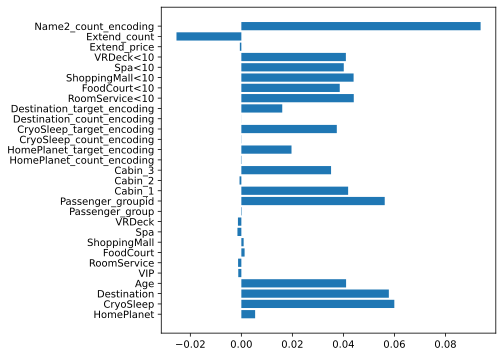

In [525]:
lr = LogisticRegression()
lr.fit(X_tr.fillna(-1), y_tr)

plt.figure(figsize=(6, 6))

plt.barh(range(X.shape[1]), lr.coef_[0])
_ = plt.yticks(range(X.shape[1]), X.columns)

## 测试集提交

In [933]:
pred = np.zeros(len(X_te))
for model in xgb_result['estimator']:
    pred += model.predict(X_te)

pred = pred > (len(cab_result['estimator'])/2)

sub = pd.read_csv('input/sample_submission.csv')
sub['Transported'] = pred
sub.to_csv('xgb.csv', index=None)

/home/lyz/.local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


## 总结与展望

- https://www.kaggle.com/code/rayenghali023/simple-preprocessing-smote-le-ohe-gridsearch
- https://www.kaggle.com/code/cv13j0/spaceship-titanic-nn-model-feature-eng

## 作者介绍